C:\Users\kayze\AppData\Local\Temp\ipykernel_20620\620578430.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMerged2002['DATE'] = pd.to_datetime(dfMerged2002['DATE']) - pd.to_timedelta(7, unit='d')


<AxesSubplot: xlabel='DATE'>

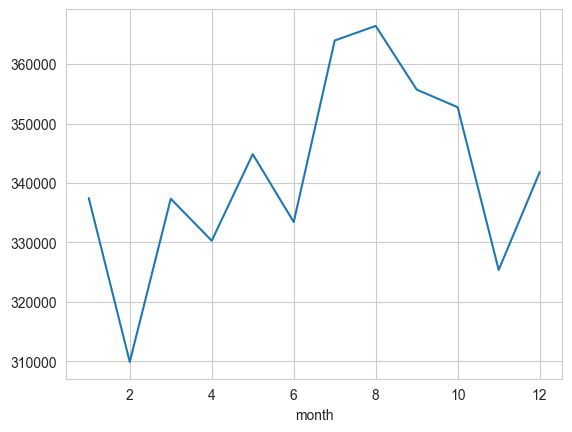

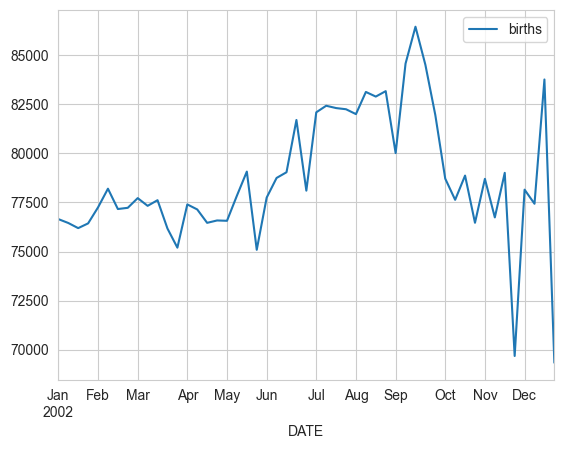

In [31]:
import pandas as pd
import matplotlib.pyplot as plt


df_1 = pd.read_csv('US_births_1994-2003_CDC_NCHS.csv')
df_1 = df_1[df_1.year < 2002]

df_2 = pd.read_csv('US_births_2000-2014_SSA.csv')
df_2 = df_2[df_2.year >= 2002]

dfMerged = pd.concat([df_1,df_2])
dfMerged = dfMerged.rename(columns = {'date_of_month' : 'day'})

dfMerged['DATE'] = pd.to_datetime(dfMerged[['year','month','day']])
dfMerged2002 = dfMerged[dfMerged.year == 2002]
dfMerged2002Month = dfMerged2002.groupby('month')['births'].sum()
dfMerged2002Month.plot(x = 'month', y = 'births')


dfMerged2002['DATE'] = pd.to_datetime(dfMerged2002['DATE']) - pd.to_timedelta(7, unit='d')
dfMerged2002perWeek = dfMerged2002.groupby([pd.Grouper(key='DATE', freq='W')])['births'].sum().reset_index()
dfMerged2002perWeek = dfMerged2002perWeek[dfMerged2002perWeek.births >= 65000 ]

dfMerged2002perWeek.plot(x = 'DATE', y = 'births')


<AxesSubplot: xlabel='month'>

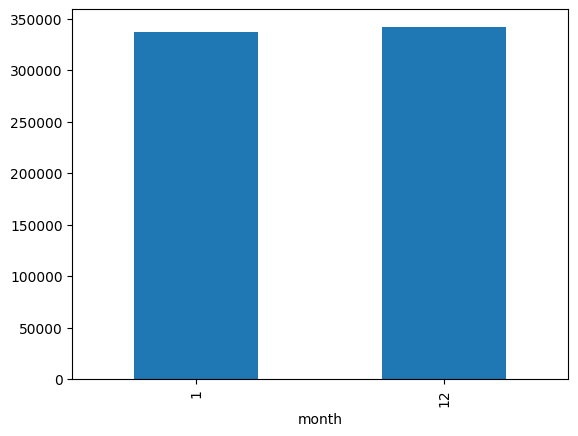

In [52]:
dfMerged2002Month.iloc[[0,11]].plot(kind = "bar")

In [30]:
import hvplot.pandas

series1 = pd.DataFrame(dfMerged2002[(dfMerged2002.month == 1)]['births']).reset_index(drop=True)
series2 = pd.DataFrame(dfMerged2002[(dfMerged2002.month == 2)]['births']).reset_index(drop=True)
series3 = pd.DataFrame(dfMerged2002[(dfMerged2002.month == 3)]['births']).reset_index(drop=True)
series4 = pd.DataFrame(dfMerged2002[(dfMerged2002.month == 4)]['births']).reset_index(drop=True)
series5 = pd.DataFrame(dfMerged2002[(dfMerged2002.month == 5)]['births']).reset_index(drop=True)
series6 = pd.DataFrame(dfMerged2002[(dfMerged2002.month == 6)]['births']).reset_index(drop=True)
series7 = pd.DataFrame(dfMerged2002[(dfMerged2002.month == 7)]['births']).reset_index(drop=True)
series8 = pd.DataFrame(dfMerged2002[(dfMerged2002.month == 8)]['births']).reset_index(drop=True)
series9 = pd.DataFrame(dfMerged2002[(dfMerged2002.month == 9)]['births']).reset_index(drop=True)
series10 = pd.DataFrame(dfMerged2002[(dfMerged2002.month == 10)]['births']).reset_index(drop=True)
series11 = pd.DataFrame(dfMerged2002[(dfMerged2002.month == 11)]['births']).reset_index(drop=True)
series12 = pd.DataFrame(dfMerged2002[(dfMerged2002.month == 12)]['births']).reset_index(drop=True)


seriesAll = pd.concat([series1,series2,series3,series4,series5,series6,series7,series8,series9,series10,series11,series12],axis=1)
seriesAll.columns = ['Январь','Февраль','Март','Апрель','Май','Июнь','Июль','Август','Сентябрь','Октябрь','Ноябрь','Декабрь']
seriesAll.hvplot()




:NdOverlay   [Variable]
   :Curve   [index]   (value)

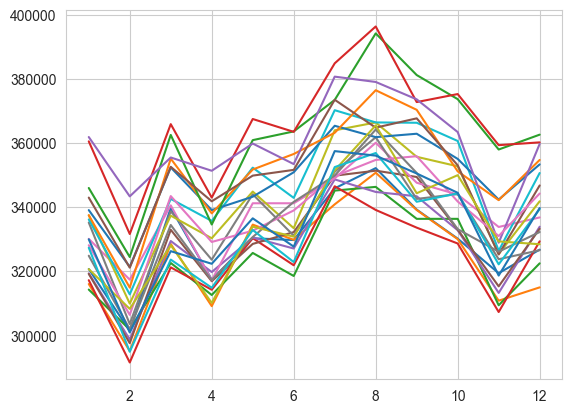

In [25]:
dfMergedMonth = dfMerged.groupby(['year','month'])['births'].sum()
dfMergedMonth = dfMergedMonth.to_frame()
dfMergedMonth.reset_index(inplace = True)
for i in set(dfMergedMonth['year']):
    dfYear = dfMergedMonth[dfMergedMonth.year == i]
    plt.plot(dfYear['month'], dfYear['births'])